# ARIMA Data Loading, Set Up, then Leading Later to Parameter Tuning, Exponential Smoothing with next month's forecast.




In [2]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load data
df = pd.read_csv('C:/Users/johfoxwo/Documents/sfm.csv')

In [4]:
df.head(19)

,Month,San_Francisco_Median_Price,Zip_Codes_Included
0,1996-04,258100,'94109
1,1996-05,260850,'94110
2,1996-06,262750,'94122
3,1996-07,265000,'94112
4,1996-08,267100,'94115
5,1996-09,267950,'94117
6,1996-10,268350,'94121
7,1996-11,269900,'94118
8,1996-12,271800,'94114
9,1997-01,273550,'94107


In [6]:
df.drop(columns=['Zip_Codes_Included'])

,Month,San_Francisco_Median_Price
0,1996-04,258100
1,1996-05,260850
2,1996-06,262750
3,1996-07,265000
4,1996-08,267100
5,1996-09,267950
6,1996-10,268350
7,1996-11,269900
8,1996-12,271800
9,1997-01,273550


In [7]:
df.index = pd.to_datetime(df.Month)

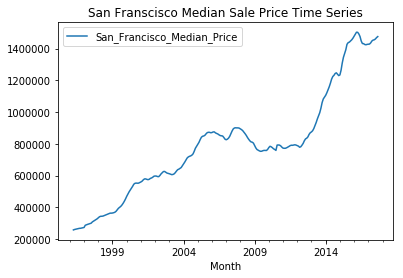

In [8]:
df.plot()
plt.title('San Franscisco Median Sale Price Time Series')
plt.show()

In [9]:
df.head(3)

,Month,San_Francisco_Median_Price,Zip_Codes_Included
Month,,,
1996-04-01,1996-04,258100,'94109
1996-05-01,1996-05,260850,'94110
1996-06-01,1996-06,262750,'94122


In [25]:
df.drop(columns=['Zip_Codes_Included','Month'])

,San_Francisco_Median_Price,price
Month,,
1996-04-01,258100,258100
1996-05-01,260850,260850
1996-06-01,262750,262750
1996-07-01,265000,265000
1996-08-01,267100,267100
1996-09-01,267950,267950
1996-10-01,268350,268350
1996-11-01,269900,269900
1996-12-01,271800,271800


In [26]:
df['price'] = pd.to_numeric(df.San_Francisco_Median_Price, errors='coerce')

In [28]:
pd.options.display.float_format = '{:,.0f}'.format # Limit output to no decimal places
df.describe()

,San_Francisco_Median_Price,price
count,258,258
mean,"790,151","790,151"
std,"330,106","330,106"
min,"258,100","258,100"
25%,"580,200","580,200"
50%,"782,850","782,850"
75%,"882,438","882,438"
max,"1,502,900","1,502,900"


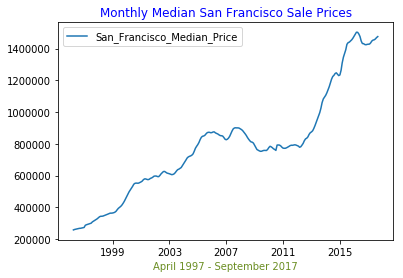

In [30]:
# Assign variables for plotting 
San_Francisco_Median_Price = df.loc[:,'San_Francisco_Median_Price']

plt.plot (San_Francisco_Median_Price)
plt.xlabel ('April 1997 - September 2017', color='olivedrab')
plt.ylabel ('', color='olivedrab')
plt.title ('Monthly Median San Francisco Sale Prices' , color='blue')
plt.legend()

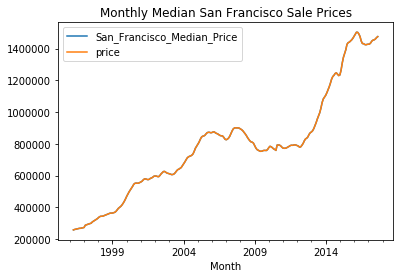

In [31]:
df.index = pd.to_datetime(df.Month)
df.plot()
plt.title('Monthly Median San Francisco Sale Prices')
plt.show()

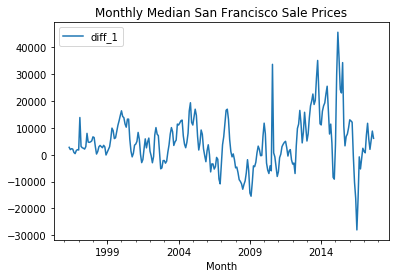

In [32]:
# Plotting the difference 

df['diff_1'] = df.price - df.price.shift()
df.plot(y='diff_1')
plt.title('Monthly Median San Francisco Sale Prices')
plt.show()

In [33]:
# Good time series reverting behavior with differencing above . . . and below is the partial autocorrelation function 
# (PACF) that takes the correlation of time series with a lagged version of itself as the correlation lags are the bars

Text(0.5,1,'Monthly Median San Francisco Sale Price')

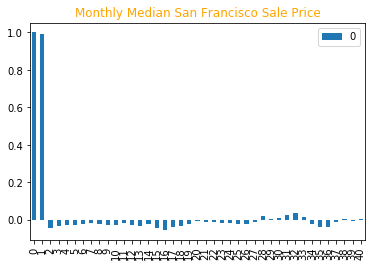

In [34]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(df.price))
x_acf.plot(kind='bar')
plt.title("Monthly Median San Francisco Sale Price", color="orange")

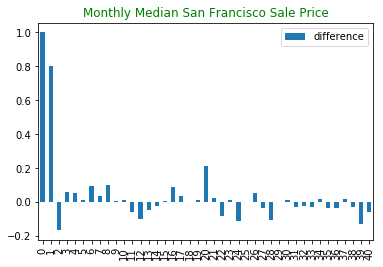

In [37]:
x_acf = pd.DataFrame(pacf(df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Monthly Median San Francisco Sale Price", color="green")
plt.legend(['difference'])

# ARIMA Model

In [38]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.price, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  257
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2719.355
Method:                           css   S.D. of innovations           9530.097
Date:                Fri, 17 May 2019   AIC                           5442.710
Time:                        10:20:49   BIC                           5449.809
Sample:                    05-01-1996   HQIC                          5445.565
                         - 09-01-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4736.9650    594.471      7.968      0.000    3571.823    5902.107
Residuals Description


C:\Users\johfoxwo\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\johfoxwo\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\johfoxwo\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\johfoxwo\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for mu

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

Not good as the confidence interval has crossed zero with 0.000 and a p value not below 0.05, 
but 3571.823 so let's configure.

Changing the lag value from zero to 1 for autoregression, difference order change from 1 to zero and not changing moving average model and keeping with zero, i.e. order=(0,1,0) to order=(1,0,0).

In [40]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.price, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                  258
Model:                     ARMA(1, 0)   Log Likelihood               -2762.456
Method:                       css-mle   S.D. of innovations          10642.322
Date:                Fri, 17 May 2019   AIC                           5530.912
Time:                        10:24:49   BIC                           5541.571
Sample:                    04-01-1996   HQIC                          5535.198
                         - 09-01-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.902e+05   6.09e+05      1.298      0.195   -4.03e+05    1.98e+06
ar.L1.price     0.9998      0.000   4516.278      0.000       0.999       1.000
                                    Roots       

C:\Users\johfoxwo\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\johfoxwo\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\johfoxwo\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
 

Better with confidence interval not crossing zero, but 0.999 and 1.000 for the autoregressive lag of ar.L1.price and a p value less then 0.05 with 0.000 is an improvement.

In [41]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.price, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

C:\Users\johfoxwo\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

# Not good, as error above are non - stationary data

# Stationary series is one in which the properties – mean, variance and covariance, do not vary with time.

# Correct with Exponential Smoothing ( decreasing weights over time )

# Forecasts produced using exponential smoothing methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older. In other words, the more recent the observation the higher the associated weight.

In [42]:
# Exponential Smoothing data treatment
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# fit model
model_expSm = SimpleExpSmoothing(df.price) 
model_expSm_fit = model_expSm.fit()

C:\Users\johfoxwo\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [43]:
# make prediction
yhat = model_expSm_fit.predict(len(df.price), len(df.price))
print(yhat)

2017-10-01   1,475,500
Freq: MS, dtype: float64


# Next month's San Francisco Median Price is 1,475,000

Text(0.5,1,'Histogram of Residuals')

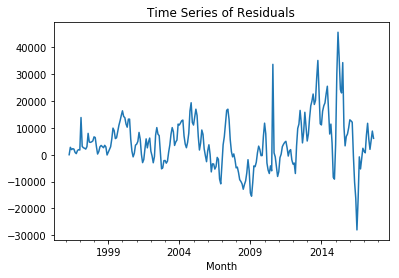

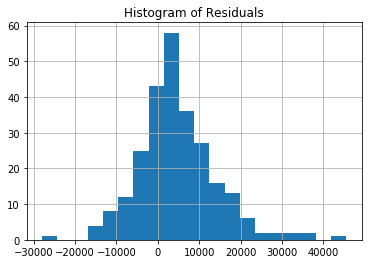

In [44]:
residuals = pd.DataFrame(model_expSm_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')